### Table 2: Trauma - CIDI and cultural.

I'm using data from a STATA save file to test odds ratios across a number of CIDI traumatic events. The CIDI/STATA spreadsheet saves things in a peculiar way but Fiona/ Luke worked it out.

The second analysis is the cultural trauma events which was found in the master spreadsheet (116 booklet).

In [16]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

### Odds ratios

In [17]:
import pandas as pd
import numpy as np
import csv as csv
from prevalence_functions import *
np.seterr(divide='ignore', invalid='ignore')
pd.options.mode.chained_assignment = None  # default='warn'

df  = pd.read_excel('STATA_booklet_LJH.xlsx','original_STATA')
CIDITrauma = pd.read_excel('STATA_booklet_LJH.xlsx','trauma_LJH')
CIDITrauma = CIDITrauma.fillna(0)
CIDITrauma[CIDITrauma==5]=0

df  = pd.read_excel('116_booklet_LJH.xlsx','116_booklet_LJH')
CulTrauma = df[["A_STOLENGEN","B_PARENTSTOLENGEN","C_SELFREMOVECIHLD",
               "D_SIBLINGREMOVE","E_CHILDRENTAKEGOVE","F_RACISMDISCRIM",
                "G_FAMILYNOTACCEPT","H_COMMNOTACCEPT","suicide_thought_ever",
                "suicide_thought_12m","suicide_atte_ever","del_self_harm","K5_dummy"]
               ]

CulTrauma[CulTrauma==2]=0 #cultural traumas are 'reverse' coded , thus:
data = pd.concat([CIDITrauma,CulTrauma],axis=1)
var_labels = list(data)
data = data.values
data = data.astype(int)

PTSD = df['ICD_PTSD12m'].values
PTSD = PTSD-1

filename = 'Notebook2.csv'
head = ["Var", "N NoPTSD","% NoPTSD","N PTSD","% NoPTSD","N Total","% Total",
        "OR", "LCI","UCI","X2","p"]

with open(filename,'w') as newFile:
    newFileWriter = csv.writer(newFile)
    newFileWriter.writerow(head)

results_master(filename,data,var_labels,PTSD)

dataPrint = pd.read_csv(filename,header = 0) # load data
dataPrint.head(len(dataPrint))

,Var,N NoPTSD,% NoPTSD,N PTSD,% NoPTSD.1,N Total,% Total,OR,LCI,UCI,X2,p
0,kidnapped,1.0,1.79,7.0,11.67,8.0,6.90,7.260000,0.86,61.070000,3.00,0.083
1,life threat mva,5.0,8.93,11.0,18.33,16.0,13.79,2.290000,0.74,7.070000,1.44,0.231
2,other life thread accident,2.0,3.57,7.0,11.67,9.0,7.76,3.570000,0.71,17.960000,1.64,0.200
3,natural disaster,6.0,10.71,18.0,30.00,24.0,20.69,3.570000,1.30,9.810000,5.44,0.020
4,man made disaster,0.0,0.00,6.0,10.00,6.0,5.17,inf,NaN,inf,4.04,0.044
5,life threat illness,3.0,5.36,4.0,6.67,7.0,6.03,1.260000,0.27,5.910000,0.01,0.925
6,beaten by parents,6.0,10.71,20.0,33.33,26.0,22.41,4.170000,1.53,11.360000,7.27,0.007
7,beaten by spouse,18.0,32.14,31.0,51.67,49.0,42.24,2.260000,1.06,4.800000,3.76,0.052
8,beaten someone else,2.0,3.57,10.0,16.67,12.0,10.34,5.400000,1.13,25.860000,4.04,0.045
9,mugged,1.0,1.79,15.0,25.00,16.0,13.79,18.330000,2.33,144.170000,11.25,0.001


#### Plot of results
Red marks denote significance

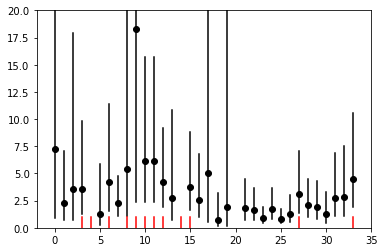

In [18]:
import matplotlib.pyplot as plt

for i in range(0,len(dataPrint)):
    plt.plot([i, i], [dataPrint["LCI"][i], dataPrint["UCI"][i]], 'k-')
    if dataPrint["p"][i] < 0.05:
        plt.plot([i,i],[0,1], 'r-')
        
plt.scatter(range(0,len(dataPrint)),dataPrint["OR"],color='k')
axes = plt.gca()
axes.set_ylim([0,20])
plt.show()

Counts of how many women experienced 0, 1 , 2 or more *CIDI* traumatic events.

In [19]:
def print_numberTrauma(df):
    n = df.shape[0]
    for i in range(0,3):
        print(np.sum(df.sum(axis=1)==i),'(',np.round((np.sum(df.sum(axis=1)==i)/n*100),2),
              '%) had ',i,'traumatic experiences') 
        if i == 2:
            print(np.sum(df.sum(axis=1)>i),'(',np.round((np.sum(df.sum(axis=1)>i)/n*100),2),
                  '%) had >',i,'traumatic experiences')

print("Number of CIDI traumatic events:")
print_numberTrauma(CIDITrauma)
print("Number of Culturual traumatic events:")
print_numberTrauma(CulTrauma)

Number of CIDI traumatic events:
23 ( 19.83 %) had  0 traumatic experiences
24 ( 20.69 %) had  1 traumatic experiences
9 ( 7.76 %) had  2 traumatic experiences
60 ( 51.72 %) had > 2 traumatic experiences
Number of Culturual traumatic events:
2 ( 1.72 %) had  0 traumatic experiences
1 ( 0.86 %) had  1 traumatic experiences
10 ( 8.62 %) had  2 traumatic experiences
103 ( 88.79 %) had > 2 traumatic experiences
